# Kernel SVM

Model Comparison by Nadhif Rif'at Rasendriya

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Kernel SVM model on the Training set

In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

## Making the Confusion Matrix

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[102   5]
 [  3  61]]


0.9532163742690059

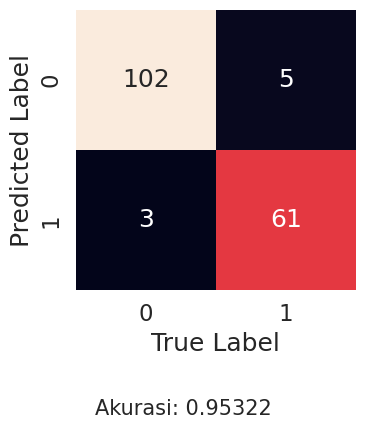

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False, ax=ax)

    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')

    plt.figtext(0.5, -0.08, f'Akurasi: {acc:.5f}', ha='center', fontsize=15)

    plt.tight_layout()
    plt.show()

plot_conf_mat(y_test, y_pred)